In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import time
import torch
import numpy as np
from tqdm import tqdm

from datetime import datetime

In [ ]:
from CVUSA_dataset import CVUSA_dataset_cropped, CVUSA_Dataset_Eval
import matplotlib.pyplot as plt
import pandas as pd
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset




transform = transforms.Compose([
    # transforms.Resize((224, 224)),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
])


# data_path = '/media/fahimul/2B721C03261BDC8D/Research/datasets/CVUSA' #don't include the / at the end
# data_path = '/home/fa947945/datasets/CVUSA_Cropped/CVUSA' #don't include the / at the end
data_path = '/data/Research/Dataset/CVUSA_Cropped/CVUSA' #don't include the / at the end

train_data= pd.read_csv(f'{data_path}/splits/train-19zl.csv')
train_ds = CVUSA_dataset_cropped(df = train_data, path=data_path, transform=transform)

anchor_img, positive_img, negative_img = train_ds[0]

anchor_img = anchor_img.permute(1, 2, 0)
positive_img = positive_img.permute(1, 2, 0)
negative_img = negative_img.permute(1, 2, 0)

# plt.imshow(anchor_img.numpy())

# plt.imshow(positive_img.numpy())


# train_loader = DataLoader(train_ds, batch_size=32, shuffle=False)




plt.subplot(1, 3, 1)
plt.imshow(anchor_img)
plt.title('anchor_img')
plt.axis('off')

# Plotting the second image
plt.subplot(1, 3, 2)
plt.imshow(positive_img)
plt.title('positive_img')
plt.axis('off')

# Plotting the third image
# plt.subplot(1, 3, 3)
# plt.imshow(negative_img)
# plt.title('negative_img')
# plt.axis('off')

plt.show()


In [ ]:
import torch
from eval import accuracy

a = torch.rand(1, 128, 96, 96)
b = torch.rand(1, 128, 96, 96)
# b = torch.rand(1, 256, 48, 48)
c = torch.rand(1, 512, 24, 24)
d = torch.rand(1, 1024, 12, 12)

query_features = torch.rand(10000, 512)

reference_features = torch.rand(10000, 512)

labels = torch.randint(1, 10000, (20,))

r1 =  accuracy(query_features=query_features, reference_features=reference_features, query_labels=labels, topk=[1, 5, 10])


In [ ]:
import torch
from torchvision.models import resnet50, ResNet50_Weights, vit_b_16, ViT_B_16_Weights
from torchsummary import summary
from models.clip_b32 import getClipModel
import torch.optim as optim
from losses import SoftTripletBiLoss
from custom_models import ResNet, VIT, CLIP_model


img1 = torch.rand(124, 3, 224, 224)
img2 = torch.rand(124, 3, 224, 224)



# from resnet_model import ResNet

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Device: {device}")
# model = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)

# model1 = CLIP_model(embed_dim=1000)
model = ResNet()

em1, em2 = model(q = img1, r = img2, isTrain = True, isQuery = True)

em1

# para1 = list(filter(lambda p: p.requires_grad, model1.parameters()))
# para2 = list(filter(lambda p: p.requires_grad, model1.parameters()))
# para = para1.append(para2)
# opti = optim.SGD(para, lr=0.001)
# emb1 = model1.encode_image(img1)
# emb2 = model2.encode_image(img2)
# for param in model1.parameters():
#     param.requires_grad = False







# print(model2)





In [ ]:
from PIL import Image
import torch
from transformers import CLIPProcessor, CLIPVisionModel
from CVUSA_dataset import CVUSA_dataset_cropped, CVUSA_Dataset_Eval
from torch.utils.data import DataLoader
import pandas as pd
from torchvision import transforms
from tqdm import tqdm
from custom_models import CLIP_model
from eval import predict, accuracy

# device = "cuda" if torch.cuda.is_available() else "cpu"

# model = CLIPVisionModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
# model = CLIP_model()
# processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# url = "/data/Research/Dataset/CVUSA_Cropped/CVUSA/streetview/panos/0000001.jpg"
# image = Image.open(url).convert('RGB')
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

data_path = '/data/Research/Dataset/CVUSA_Cropped/CVUSA' #don't include the / at the end
train_data= pd.read_csv(f'{data_path}/splits/train-19zl.csv')
train_ds = CVUSA_dataset_cropped(df = train_data, path=data_path, transform=transform)
val_que = CVUSA_Dataset_Eval(data_folder=data_path, split='train', img_type='query', transforms=transform)
val_ref = CVUSA_Dataset_Eval(data_folder=data_path, split='train', img_type='reference', transforms=transform)

train_load = DataLoader(train_ds, batch_size=32, shuffle=False)
val_loader_que = DataLoader(val_que, batch_size=32, shuffle=False)
val_loader_ref = DataLoader(val_ref, batch_size=32, shuffle=False)


anc, pos, neg, txt = train_ds[50]

txt
# def get_vision_embeddings(img):
#     # Preprocess the images
#     img = img.to(device)
#     temp_dic = {'pixel_values':img}
#     # Use the CLIP model to get vision embeddings
#     with torch.no_grad():
#         outputs = model(**temp_dic)
#         last_hidden_state = outputs.last_hidden_state
#         pooled_output = outputs.pooler_output  # pooled CLS states
#     return pooled_output


# img_features_list = []
# for idx, (img, label ) in enumerate(tqdm(val_loader_que)):
#     anchor_embedding = get_vision_embeddings(img)

#     img_features_list.append(anchor_embedding)
#     # print(anchor_embedding.shape)
# img_features = torch.cat(img_features_list, dim=0) 
# print(img_features.shape)

# for idx, (anchor, positive, negative) in enumerate(tqdm(train_load)):
#     anchor_embedding = get_vision_embeddings(anchor)
#     positive_embedding = get_vision_embeddings(positive)
#     print(anchor_embedding.shape)
#     print(positive_embedding.shape)

# print(anchor_embedding)

# print("\nExtract Features:")
# query_features, query_labels = predict(model=model, dataloader=val_loader_que, dev=device, isQuery=True)
# reference_features, reference_labels = predict(model = model, dataloader=val_loader_ref, dev=device, isQuery=False) 



# print(query_features)


# r1 =  accuracy(query_features=query_features, reference_features=reference_features, query_labels=query_labels, topk=[1, 5, 10])
    

In [42]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel, CLIPVisionModelWithProjection, AutoProcessor

model = CLIPVisionModelWithProjection.from_pretrained("openai/clip-vit-large-patch14")
processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
image_embeds = outputs.image_embeds
image_embeds.shape
# logits_per_image = outputs.logits_per_image # this is the image-text similarity score
# probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
model

CLIPVisionModelWithProjection(
  (vision_model): CLIPVisionTransformer(
    (embeddings): CLIPVisionEmbeddings(
      (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
      (position_embedding): Embedding(257, 1024)
    )
    (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-23): 24 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=1024, out_featur

In [47]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel, CLIPTextModelWithProjection

# model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
model_t = CLIPTextModelWithProjection.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(text=["a photo of a cat", "a photo of a dog"])

outputs = model_t(**inputs)
# logits_per_image = outputs.logits_per_image # this is the image-text similarity score
# probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities


AttributeError: 'list' object has no attribute 'size'

In [ ]:
from transformers import tokenization_utils_base
import torch
from eval import predict, accuracy
import numpy as np

input = torch.rand(32, 3, 224, 224)

temp_queue = torch.randn(5, 8)
temp_ref = torch.randn(10659, 256)



# ranking = np.sum((similarity[i,:]>similarity[i,i])*1.)

# query_features_norm = np.sqrt(np.sum((temp_queue**2).numpy(), axis=1, keepdims=True))

# similarity = torch.randn(10, 10).numpy()
# for i in range(10):
#     ranking = np.sum((similarity[i,:]>similarity[i,i])*1.)


# temp_queue.to(torch.float16)
# print(temp_queue)

# temp_queue.to(torch.float32)
# print(temp_queue)




In [ ]:
from torch.utils.data import DataLoader
import pandas as pd
from torchvision import transforms
from CVUSA_dataset import CVUSA_dataset_cropped, CVUSA_Dataset_Eval
from tqdm import tqdm
import torch
from transformers import AutoTokenizer
from custom_models import ResNet, VIT, CLIP_model
from eval import predict, accuracy, calculate_scores

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CLIP_model(embed_dim=512)

data_path = '/data/Research/Dataset/CVUSA_Cropped/CVUSA' #don't include the / at the end
train_data= pd.read_csv(f'{data_path}/splits/train-19zl.csv', header=None)
val_data= pd.read_csv(f'{data_path}/splits/val-19zl.csv', header=None)
train_ds = CVUSA_dataset_cropped(df = train_data, path=data_path, transform=transform)
val_ds = CVUSA_dataset_cropped(df = val_data, path=data_path, transform=transform)

tokenizer = AutoTokenizer.from_pretrained('openai/clip-vit-base-patch32')

# val_que = CVUSA_Dataset_Eval(data_folder=data_path, split='train', img_type='query', transforms=transform)

# val_ref = CVUSA_Dataset_Eval(data_folder=data_path, split='train', img_type='reference', transforms=transform)

train_load = DataLoader(train_ds, batch_size=32, shuffle=False)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)
# val_loader_ref = DataLoader(val_ref, batch_size=32, shuffle=False)

query_features, reference_features, labels = predict(model=model, dataloader=val_loader, dev=device, isQuery=True)

print('QUE')
print(query_features.shape)

print('reff')
print(reference_features.shape)

print('labels')
print(labels.shape)
# for i, (anchor, positive, negative, txt, idx) in enumerate(tqdm(val_loader)):
 
#     # txt = tokenizer(txt, padding=True, truncation=True, return_tensors="pt", max_length=77)
#     # txt = txt.to(device)

#     print(idx)
#     if i==5: break



In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained('openai/clip-vit-base-patch32')
data_path = '/data/Research/Dataset/CVUSA_Cropped/CVUSA' #don't include the / at the end
train_data= pd.read_csv(f'{data_path}/splits/train-19zl_30.csv', header=None)

# Define the dataset
# class TextDataset(Dataset):
#     def __init__(self, texts):
#         self.texts = texts

#     def __len__(self):
#         return len(self.texts)

#     def __getitem__(self, idx):
#         return self.texts[idx]

# # Custom collate function
# def collate_fn(batch):
#     # Tokenize the batch
#     encoding = tokenizer(batch, padding=True, truncation=True, return_tensors="pt")
#     return encoding['input_ids'], encoding['attention_mask']

# # Example text data
# texts = ["Hello, are you?", "I am fine, thank you!", "How about you?", "I am doing just fine. But I think it will not last very long.", ]

# # Create the dataset and dataloader
# dataset = TextDataset(texts)
# dataloader = DataLoader(dataset, batch_size=3, collate_fn=collate_fn)

# # Iterate through the dataloader
# for batch in dataloader:
#     input_ids, attention_mask = batch
#     print("Input IDs:\n", input_ids)
#     print("Attention Mask:\n", attention_mask)
train_data

In [ ]:
from attributes import Configuration
hymp = Configuration()
hymp.epochs = 20
# hymp1 = Configuration()
print(hymp.expID)
# print(hymp1.expID)


In [41]:
from transformers import AutoTokenizer, CLIPTextModelWithProjection, CLIPTextConfig
import torch
from torch.utils.data import DataLoader


ttx = "The image features a white car parked on a street in front of a house. The car is positioned near the center of the scene, and there is a bicycle located on the left side of the car. The house is situated behind the car, and there is a tree nearby. The overall scene appears to be a residential area with a mix of vehicles and greenery."
ttx2 = "The image features a lush green forest with tall trees and a grassy area. The forest is located next to a road, and there are power lines running above it. The scene is filled with various plants and trees, creating a serene and natural atmosphere."

device = "cuda" if torch.cuda.is_available() else "cpu"

# config_cus = CLIPTextConfig.from_pretrained('openai/clip-vit-base-patch32')

# config_cus.max_position_embeddings = 128 

# model = CLIPTextModelWithProjection.from_pretrained("openai/clip-vit-base-patch32").to(device)
model = CLIPTextModelWithProjection.from_pretrained("openai/clip-vit-base-patch32").to(device)
# model.config = config_cus
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")

inputs = tokenizer([ttx, ttx2], padding=True, return_tensors="pt", max_length=77, truncation=True).to(device)

outputs = model(**inputs)
text_embeds = outputs.text_embeds




model.text_projection.out_features


/home/fahimul/.conda/envs/CVGL/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


512

In [ ]:
from PIL import Image
import requests
from transformers import AutoProcessor, CLIPVisionModelWithProjection

model = CLIPVisionModelWithProjection.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(images=image, return_tensors="pt").to(device)

outputs = model(inputs.pixel_values)
image_embeds = outputs.image_embeds

image_embeds

In [ ]:
model

In [ ]:
import pandas as pd

df = pd.read_csv('/data/Research/Dataset/CVUSA_Cropped/CVUSA/lang/T1_train-19zl.csv')

df['Text']

In [ ]:
import math

dt = datetime.now()
f"{math.floor(dt.timestamp())}"[4:]

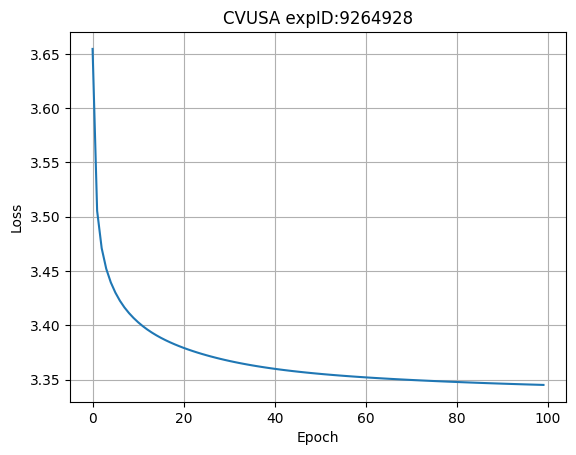

In [12]:
import matplotlib.pyplot as plt

expID='9337198'

file_path = f'/data/Research/CVGL_Baseline/logs/log_{expID}.txt'  # Replace with the path to your text file
keyword = 'Loss_on_epoch'
top=5

def extract_lines(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    result = []
    for line in lines:
        if "Loss_on_epoch" in line:
            parts = line.split("=>")
            result.append(parts)

    return result


extracted_lines = extract_lines(file_path)
acc = []
x = []

# # Print the extracted lines
for i, line in enumerate(extracted_lines):
    # print(line)
    x.append(i)
    acc.append(float(line[1]))





# Plotting
plt.plot(x, acc)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CVUSA expID:9264928' )
plt.grid(True)
plt.show()

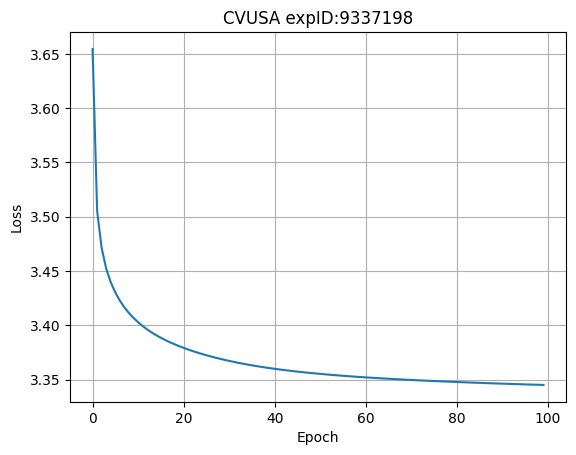

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

expID = '9337198'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(f'/data/Research/CVGL_Baseline/losses/losses_{expID}.csv')

# Assuming the first column is x-axis and the second column is y-axis
x = df.iloc[:, 0]
y = df.iloc[:, 1]

# Plotting
plt.plot(x, y)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'CVUSA expID:{expID}' )
plt.grid(True)
plt.show()


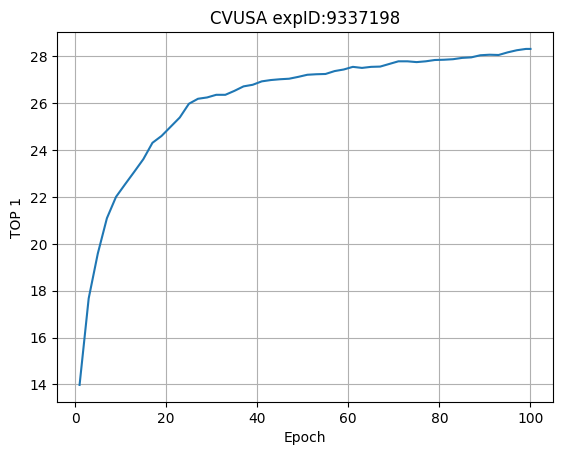

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
expID = '9337198'
df = pd.read_csv(f'/data/Research/CVGL_Baseline/rank/rank_{expID}.csv')

# Assuming the first column is x-axis and the second column is y-axis
x = df.iloc[:, 0]
y = df.iloc[:, 1]

# Plotting
plt.plot(x, y)
plt.xlabel('Epoch')
plt.ylabel('TOP 1')
plt.title(f'CVUSA expID:{expID}' )
plt.grid(True)
plt.show()

In [ ]:
a = torch.rand(128, 1000)
b = torch.rand(128, 1000)


# a_norm = np.sqrt(np.sum(a**2, axis=1, keepdims=True))

a_norm = np.sqrt(np.sum((a**2).numpy(), axis=1, keepdims=True))
b_norm = np.sqrt(np.sum((b**2).numpy(), axis=1, keepdims=True))

sim = np.matmul(a/a_norm, (b/b_norm).T)

eyes_ = torch.eye(5).cuda()
print(eyes_)
pos_mask = eyes_.eq(0.5)
pos_mask

In [ ]:
import torch
import clip
n=5
m=10
inputs_q = torch.randn(n,m).cuda()
inputs_k = torch.randn(n,m).cuda()



n = inputs_q.size(0)

normalized_inputs_q = inputs_q / torch.norm(inputs_q, dim=1, keepdim=True)
normalized_inputs_k = inputs_k / torch.norm(inputs_k, dim=1, keepdim=True)
# normalized_inputs_q = inputs_q
# normalized_inputs_k = inputs_k
# print(normalized_inputs_q)
# print(normalized_inputs_k)


# # Compute similarity matrix
# sim_mat = torch.matmul(normalized_inputs_q, normalized_inputs_k.t())

# print(sim_mat)

sim_mat = normalized_inputs_q @ normalized_inputs_k.T

print(sim_mat)

# split the positive and negative pairs
eyes_ = torch.eye(n).cuda()

pos_mask = eyes_.eq(1)
neg_mask = ~pos_mask


pos_sim = torch.masked_select(sim_mat, pos_mask)
neg_sim = torch.masked_select(sim_mat, neg_mask)

# Contrastive loss of the example values
# temp parameter
t = 0.07
# concatenated vector divided by the temp parameter
for i in range(n):
    row = sim_mat[i]/t
    pos = row[i]

    exp = torch.exp(row)

    loss = -torch.log(pos/torch.sum(exp))
    print(loss)
    # #e^x of the values
    # exp = np.exp(logits)
    # # we only need to take the log of the positive value over the sum of exp. 
    # loss = - np.log(exp[0]/np.sum(exp))






# loss_batch = torch.log(1 + torch.exp((neg_sim_ - pos_sim_) * self.alpha))
# if torch.isnan(loss_batch).any():
#     print(inputs_q, inputs_k)
#     raise Exception

# loss = loss_batch.mean()

# mean_pos_sim = pos_sim.mean().item()
# mean_neg_sim = neg_sim.mean().item()
# loss, mean_pos_sim, mean_neg_sim


In [ ]:
triplet_loss = nn.TripletMarginLoss(margin=1.0, p=2, eps=1e-7)
anchor = torch.randn(100, 128, requires_grad=True)
positive = torch.randn(100, 128, requires_grad=True)
negative = torch.randn(100, 128, requires_grad=True)
output = triplet_loss(anchor, positive, negative)
output.backward()

In [ ]:
import torch
import clip
from PIL import Image
from models.clip_b32 import getClipModel


device = "cuda" if torch.cuda.is_available() else "cpu"
model = getClipModel()
model

# image = preprocess(Image.open("CLIP.jpg")).unsqueeze(0).to(device)
# for i in range(5):
#     image = torch.rand(64, 3, 224, 224)
#     image = preprocess(image).unsqueeze(0).to(device)
#     # text = clip.tokenize(["a diagram", "a dog", "a stallion"]).to(device)

#     with torch.no_grad():
#         image_features = model.encode_image(image)
#         fet.append(image)
        # text_features = model.encode_text(text)
    
#     logits_per_image, logits_per_text = model(image, text)
#     probs = logits_per_image.softmax(dim=-1).cpu().numpy()

# print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]


In [ ]:
import torch 

model_st = torch.load('model_weights/model_st.pth')
model_eval = torch.load('model_weights/model_eval.pth')
model_tr = torch.load('model_weights/model_tr.pth')



for param in model_st.parameters():
  print(param.data)






In [ ]:
for param in model_tr.parameters():
  print(param.data)

In [ ]:
 
import torch
for i in range(torch.cuda.device_count()):
   print(torch.cuda.get_device_properties(i).name)

torch.cuda.set_device(0)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



In [ ]:
from attributes import Configuration as hmm

hmm.epochs